# TMB Feature Analysis
This notebook details a sample analysis of TMB (tumor mutational burden) performed on METABRIC clinical data. The purpose is to evaluate if TMB can be a potentially good feature to help group patients by subtype. 
### Significance of Immunotherapy based on TMB

https://cancerci.biomedcentral.com/articles/10.1186/s12935-020-01472-9

https://bmcurol.biomedcentral.com/articles/10.1186/s12894-021-00795-7

### Separating by TMB

https://ascopubs.org/doi/abs/10.1200/JCO.2021.39.15_suppl.1091

https://jitc.bmj.com/content/6/1/157

## Installations/Imports

In [68]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 9.9 MB 13.2 MB/s            
     |████████████████████████████████| 233 kB 86.1 MB/s            


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Clinical Data

In [2]:
clinical_df = pd.read_csv('brca_metabric_clinical_data.tsv',sep='\t')
clinical_df

,Study ID,Patient ID,Sample ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,...,Relapse Free Status (Months),Relapse Free Status,Number of Samples Per Patient,Sample Type,Sex,3-Gene classifier subtype,TMB (nonsynonymous),Tumor Size,Tumor Stage,Patient's Vital Status
0,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,138.65,0:Not Recurred,1,Primary,Female,ER-/HER2-,0.000000,22.0,2.0,Living
1,brca_metabric,MB-0002,MB-0002,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,LumA,...,83.52,0:Not Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,10.0,1.0,Living
2,brca_metabric,MB-0005,MB-0005,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,YES,LumB,...,151.28,1:Recurred,1,Primary,Female,NaN,2.615035,15.0,2.0,Died of Disease
3,brca_metabric,MB-0006,MB-0006,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,YES,LumB,...,162.76,0:Not Recurred,1,Primary,Female,NaN,1.307518,25.0,2.0,Living
4,brca_metabric,MB-0008,MB-0008,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,YES,LumB,...,18.55,1:Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,brca_metabric,MTS-T2428,MTS-T2428,70.05,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,...,4.93,1:Recurred,1,Primary,Female,NaN,2.615035,27.0,1.0,NaN
2505,brca_metabric,MTS-T2429,MTS-T2429,63.60,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,...,16.18,1:Recurred,1,Primary,Female,NaN,5.230071,28.0,2.0,NaN
2506,brca_metabric,MTS-T2430,MTS-T2430,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,...,NaN,NaN,1,Primary,Female,NaN,7.845106,NaN,0.0,NaN
2507,brca_metabric,MTS-T2431,MTS-T2431,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,...,NaN,NaN,1,Primary,Female,NaN,9.152624,NaN,0.0,NaN


## Reduce to TMB and Subtype
Filter dataframe such that patients with good values in desired features are selected.

In [3]:
clinical_df = clinical_df[["Patient ID", "TMB (nonsynonymous)", "Pam50 + Claudin-low subtype"]]
clinical_df = clinical_df[clinical_df["Pam50 + Claudin-low subtype"] != "NC"]
clinical_df = clinical_df.dropna().reset_index()
clinical_df

,index,Patient ID,TMB (nonsynonymous),Pam50 + Claudin-low subtype
0,0,MB-0000,0.000000,claudin-low
1,1,MB-0002,2.615035,LumA
2,2,MB-0005,2.615035,LumB
3,3,MB-0006,1.307518,LumB
4,4,MB-0008,2.615035,LumB
...,...,...,...,...
1969,1980,MB-7295,5.230071,LumA
1970,1981,MB-7296,7.845106,LumB
1971,1982,MB-7297,5.230071,LumB
1972,1983,MB-7298,19.612766,LumB


## High-Low Classification
Patients are classified into either TMB-High or TMB-Low. According to other papers, the typical cut-off for TMB high-low splits is 10

In [4]:
tmb_threshold = 10
high = []
low = []
for index, row in clinical_df.iterrows():
    if row["TMB (nonsynonymous)"] >= tmb_threshold:
        high.append(1)
        low.append(0)
    else:
        high.append(0)
        low.append(1)
clinical_df["TMB-H"] = pd.Series(high)
clinical_df["TMB-L"] = pd.Series(low)
clinical_df

,index,Patient ID,TMB (nonsynonymous),Pam50 + Claudin-low subtype,TMB-H,TMB-L
0,0,MB-0000,0.000000,claudin-low,0,1
1,1,MB-0002,2.615035,LumA,0,1
2,2,MB-0005,2.615035,LumB,0,1
3,3,MB-0006,1.307518,LumB,0,1
4,4,MB-0008,2.615035,LumB,0,1
...,...,...,...,...,...,...
1969,1980,MB-7295,5.230071,LumA,0,1
1970,1981,MB-7296,7.845106,LumB,0,1
1971,1982,MB-7297,5.230071,LumB,0,1
1972,1983,MB-7298,19.612766,LumB,1,0


## TMB Histogram
Visual graph on what the TMB-High/TMB-Low counts of patients are for each subtype

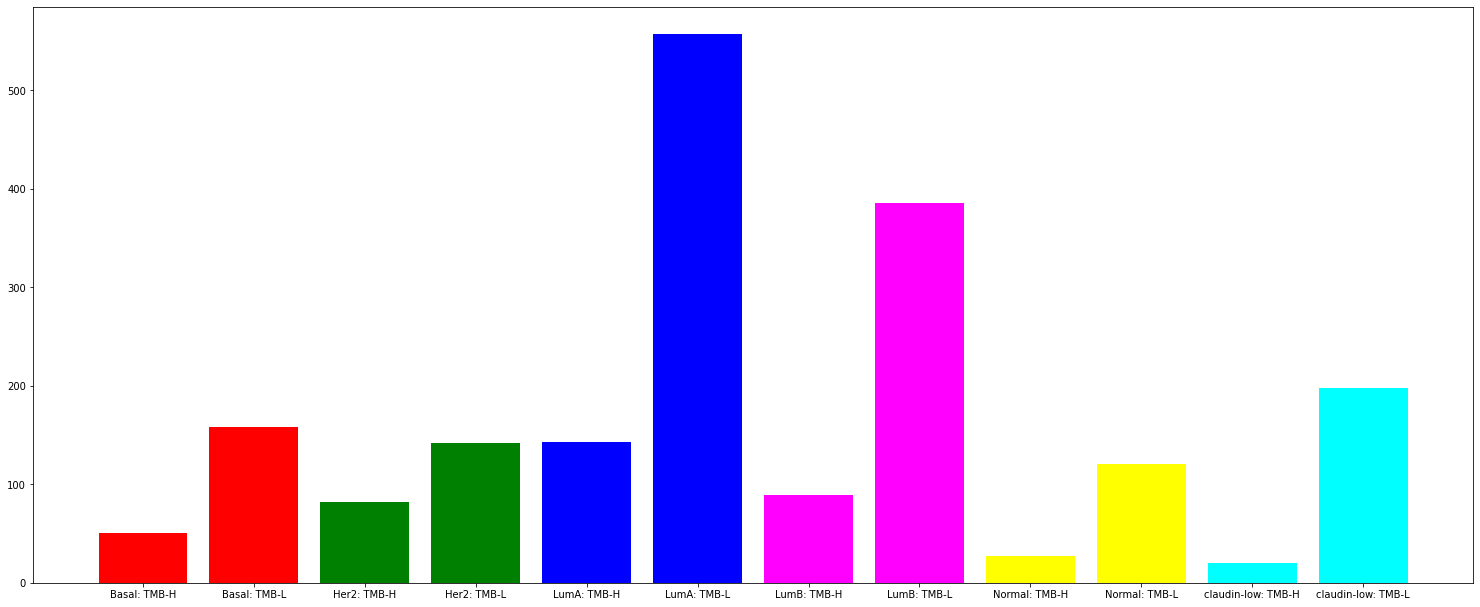

In [18]:
fig = plt.figure(1, [20, 8])
ax = fig.add_axes([0,0,1,1])
bar = clinical_df
bar["Pam50 + Claudin-low subtype high"] = bar["Pam50 + Claudin-low subtype"] + ": TMB-H"
bar["Pam50 + Claudin-low subtype low"] = bar["Pam50 + Claudin-low subtype"] + ": TMB-L"
patients = list(bar["Pam50 + Claudin-low subtype high"].unique()) + list(bar["Pam50 + Claudin-low subtype low"].unique())
patients = list(np.sort(np.array(patients)))
subtype_burden = pd.Series([0] * 12)
subtype_burden.index = patients
for index, row in clinical_df.iterrows():
    if row["TMB-H"] == 1:
        subtype_burden[row["Pam50 + Claudin-low subtype"] + ": TMB-H"] += 1
    else:
        subtype_burden[row["Pam50 + Claudin-low subtype"] + ": TMB-L"] += 1
ax.bar(patients,list(subtype_burden), color=['red', 'red', 'green', 'green', 'blue', 'blue', 'magenta', 'magenta', 'yellow', 'yellow', 'cyan', 'cyan'])
plt.show()

## High-Low Ratio
See how the ratio between TMB-High and TMB-Low for each subtype differs.

In [39]:
subtypes = ['Basal', 'Her2', 'LumA', 'LumB', 'Normal', 'claudin-low']
fill = [0] * 6
burden_ratios = pd.DataFrame()
burden_ratios['Subtypes'] = subtypes
burden_ratios['Highs'] = fill
burden_ratios['Lows'] = fill
burden_ratios.set_index("Subtypes", inplace = True)
for index in subtype_burden.index:
    tokens = index.split()
    if tokens[1] == "TMB-H":
        burden_ratios.loc[tokens[0][:len(tokens[0])-1]]['Highs'] = subtype_burden[index]
    else:
        burden_ratios.loc[tokens[0][:len(tokens[0])-1]]['Lows'] = subtype_burden[index]
burden_ratios['High-Low Ratio'] = burden_ratios['Highs'] / burden_ratios['Lows']
burden_ratios

,Highs,Lows,High-Low Ratio
Subtypes,,,
Basal,51,158,0.322785
Her2,82,142,0.577465
LumA,143,557,0.256732
LumB,89,386,0.230570
Normal,27,121,0.223140
claudin-low,20,198,0.101010


## Subtype TMB Boxplot

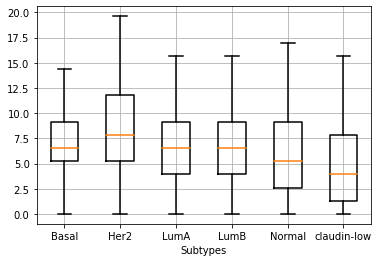

In [63]:
data = pd.DataFrame(columns=subtypes)
for index, row in clinical_df.iterrows():
    temp = pd.Series(index=subtypes, dtype='float64')
    temp[row['Pam50 + Claudin-low subtype']] = row['TMB (nonsynonymous)']
    data = data.append(temp, ignore_index=True)
ax = data.plot(kind='box',
             boxprops=dict(linestyle='-', linewidth=1.5),
             flierprops=dict(linestyle='-', linewidth=1.5),
             medianprops=dict(linestyle='-', linewidth=1.5),
             whiskerprops=dict(linestyle='-', linewidth=1.5),
             capprops=dict(linestyle='-', linewidth=1.5),
             showfliers=False, grid=True, rot=0)
ax.set_xlabel('Subtypes')
# ax.set_ylabel('Bar in X')
# plt.suptitle("")
plt.show()

## One-Way ANOVA
Values for f score and p score

In [66]:
from scipy import stats
l_data = [clinical_df['TMB (nonsynonymous)'][clinical_df['Pam50 + Claudin-low subtype'] == grp] for grp in subtypes]
f, p = stats.f_oneway(*l_data)
f, p

(20.616751106313178, 4.045097561759346e-20)

## ANOVA Table

In [89]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
data = clinical_df[['Pam50 + Claudin-low subtype', 'TMB (nonsynonymous)']]
data = data.rename(columns={"Pam50 + Claudin-low subtype": "Subtype", "TMB (nonsynonymous)": "TMB"})
data
model = ols('TMB ~ Subtype', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Subtype,2911.400478,5.0,20.616751,4.045098e-20
Residual,55582.337977,1968.0,NaN,NaN
